In [1]:
# import the necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_excel("SampleData.xlsx")
dataset

,Unnamed: 0,Id,Type,Date,CountA,CountB,CountC,FeedBack
0,1.0,10121.0,Email,2016-08-04 10:16:47,0.096352,0.769845,0.159108,Others
1,2.0,10122.0,Email,2016-08-04 10:18:28,0.586269,0.953805,0.351482,Others
2,3.0,10123.0,Email,2016-08-04 10:30:24,0.723392,0.761742,0.527675,Others
3,4.0,10124.0,Email,2016-08-04 10:41:56,0.516635,0.391858,0.425367,Others
4,5.0,10125.0,Email,2016-08-04 10:59:00,0.112042,0.651565,0.514086,Others
...,...,...,...,...,...,...,...,...
59,58.0,10215.0,Update,2016-08-04 17:44:26,0.450194,0.053212,0.103549,NaN
60,59.0,10216.0,Email,2016-08-04 17:44:37,0.413114,0.600757,0.041972,Others
61,60.0,10217.0,Update,2016-08-04 18:07:52,0.595915,0.759617,0.771144,NC
62,61.0,10218.0,Email,2016-08-04 19:04:04,0.691952,0.189839,0.246419,Others


### DATA PreProcessing

In [4]:
dataset=dataset.drop('Unnamed: 0',axis=1)

* After imnporting the dataset from the excel files
* Analysis the dataset the Unnamed: 0 columns is same as index
* so we can drop the columns in the dataset

In [5]:
dataset

,Id,Type,Date,CountA,CountB,CountC,FeedBack
0,10121.0,Email,2016-08-04 10:16:47,0.096352,0.769845,0.159108,Others
1,10122.0,Email,2016-08-04 10:18:28,0.586269,0.953805,0.351482,Others
2,10123.0,Email,2016-08-04 10:30:24,0.723392,0.761742,0.527675,Others
3,10124.0,Email,2016-08-04 10:41:56,0.516635,0.391858,0.425367,Others
4,10125.0,Email,2016-08-04 10:59:00,0.112042,0.651565,0.514086,Others
...,...,...,...,...,...,...,...
59,10215.0,Update,2016-08-04 17:44:26,0.450194,0.053212,0.103549,NaN
60,10216.0,Email,2016-08-04 17:44:37,0.413114,0.600757,0.041972,Others
61,10217.0,Update,2016-08-04 18:07:52,0.595915,0.759617,0.771144,NC
62,10218.0,Email,2016-08-04 19:04:04,0.691952,0.189839,0.246419,Others


In [6]:
dataset.head()

,Id,Type,Date,CountA,CountB,CountC,FeedBack
0,10121.0,Email,2016-08-04 10:16:47,0.096352,0.769845,0.159108,Others
1,10122.0,Email,2016-08-04 10:18:28,0.586269,0.953805,0.351482,Others
2,10123.0,Email,2016-08-04 10:30:24,0.723392,0.761742,0.527675,Others
3,10124.0,Email,2016-08-04 10:41:56,0.516635,0.391858,0.425367,Others
4,10125.0,Email,2016-08-04 10:59:00,0.112042,0.651565,0.514086,Others


In [7]:
dataset.tail()

,Id,Type,Date,CountA,CountB,CountC,FeedBack
59,10215.0,Update,2016-08-04 17:44:26,0.450194,0.053212,0.103549,NaN
60,10216.0,Email,2016-08-04 17:44:37,0.413114,0.600757,0.041972,Others
61,10217.0,Update,2016-08-04 18:07:52,0.595915,0.759617,0.771144,NC
62,10218.0,Email,2016-08-04 19:04:04,0.691952,0.189839,0.246419,Others
63,10219.0,Update,2016-08-04 19:04:15,0.214113,0.721562,0.123712,Undecided


In [8]:
dataset.shape

(64, 7)

In [9]:
dataset.describe()#(include='all')

,Id,CountA,CountB,CountC
count,64.000000,64.000000,64.000000,64.000000
mean,10158.500000,0.533243,0.540540,0.465260
std,29.131884,0.265006,0.288266,0.271288
min,10121.000000,0.075979,0.015813,0.012590
25%,10136.750000,0.322746,0.328622,0.253948
50%,10152.500000,0.553836,0.604270,0.429396
75%,10168.250000,0.743971,0.762401,0.677926
max,10219.000000,0.985210,0.998432,0.933021


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Id        64 non-null     float64       
 1   Type      63 non-null     object        
 2   Date      64 non-null     datetime64[ns]
 3   CountA    64 non-null     float64       
 4   CountB    64 non-null     float64       
 5   CountC    64 non-null     float64       
 6   FeedBack  62 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 3.6+ KB


In [11]:
dataset=dataset.astype({'Id':int})

In [12]:
dataset.dtypes

Id                   int32
Type                object
Date        datetime64[ns]
CountA             float64
CountB             float64
CountC             float64
FeedBack            object
dtype: object

In [13]:
dataset[dataset.duplicated()].shape

(0, 7)

In [14]:
dataset.isna().sum()

Id          0
Type        1
Date        0
CountA      0
CountB      0
CountC      0
FeedBack    2
dtype: int64

In [15]:
null=pd.DataFrame({'Null Values' :dataset.isna().sum().
                   sort_values(ascending=True),
                  "percentage of Null Values":(dataset.isna().sum().sort_values(ascending=False))/(dataset.shape[0])*(100)})
null

,Null Values,percentage of Null Values
CountA,0,0.0000
CountB,0,0.0000
CountC,0,0.0000
Date,0,0.0000
FeedBack,2,3.1250
Id,0,0.0000
Type,1,1.5625


Finding the index of the null values present in dataset

In [18]:
dataset[dataset['Type'].isnull()].index.tolist()

[6]

In [19]:
dataset[dataset['FeedBack'].isnull()].index.tolist()

[15, 59]

In [22]:
dataset.head(7)

,Id,Type,Date,CountA,CountB,CountC,FeedBack
0,10121,Email,2016-08-04 10:16:47,0.096352,0.769845,0.159108,Others
1,10122,Email,2016-08-04 10:18:28,0.586269,0.953805,0.351482,Others
2,10123,Email,2016-08-04 10:30:24,0.723392,0.761742,0.527675,Others
3,10124,Email,2016-08-04 10:41:56,0.516635,0.391858,0.425367,Others
4,10125,Email,2016-08-04 10:59:00,0.112042,0.651565,0.514086,Others
5,10126,Email,2016-08-04 10:59:00,0.863955,0.878995,0.857369,Others
6,10127,NaN,2016-08-04 11:01:08,0.683207,0.422938,0.398313,Others


In [23]:
dataset.nunique()#value_counts()

Id          63
Type         4
Date        62
CountA      64
CountB      64
CountC      64
FeedBack     8
dtype: int64

In [28]:
Value_counts=pd.DataFrame({'Type':dataset['Type'].value_counts()})
Value_counts

,Type
Update,37
Email,19
Call,7
Visit,1


In [26]:
dataset=dataset.fillna(method='ffill')

In [27]:
Value_counts=pd.DataFrame({'FeedBack':dataset['FeedBack'].value_counts()})
Value_counts

,FeedBack
Others,29
NC,15
nc,13
UNDECIDED,2
Undecided,2
NI,1
undecided,1
undecided,1


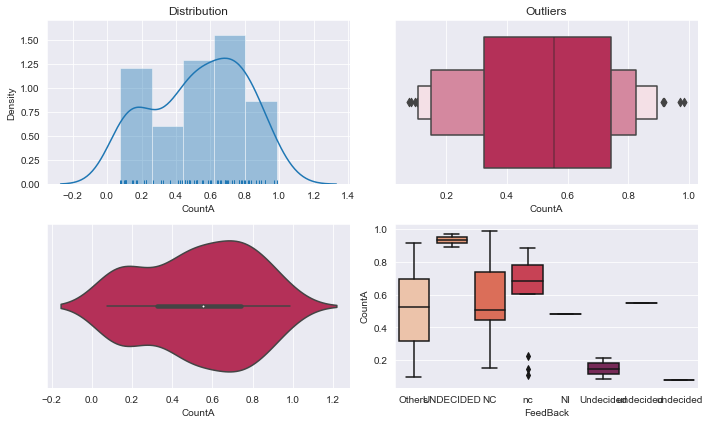

In [179]:
# Checking The distribution of CountA feature
fig,ax=plt.subplots(2,2,figsize=(10,6))

sns.distplot(dataset['CountA'],rug=True,ax=ax[0,0])
ax[0,0].set_title("Distribution")

sns.boxenplot(x=dataset['CountA'],data=dataset,palette='rocket_r',ax=ax[0,1])
ax[0,1].set_title("Outliers")

sns.violinplot(x=dataset['CountA'],alpha=.7,palette='rocket_r',data=dataset,ax=ax[1,0])
sns.boxplot(x=dataset['FeedBack'],y=dataset['CountA'],data=dataset,palette='rocket_r',ax=ax[1,1])

plt.tight_layout()
plt.show()

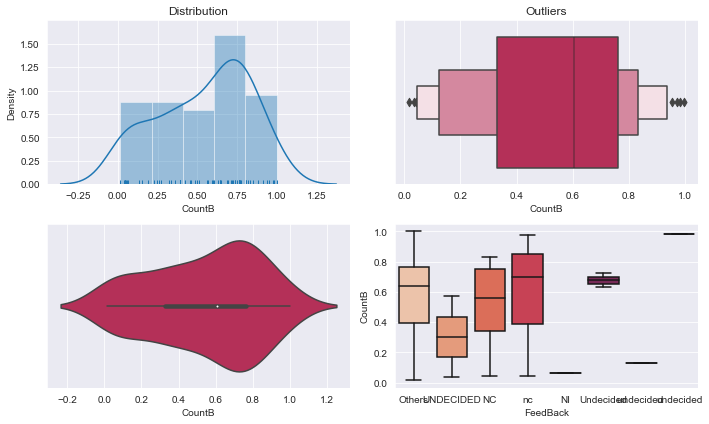

In [180]:
# Checking The distribution of CountB feature
fig,ax=plt.subplots(2,2,figsize=(10,6))

sns.distplot(dataset['CountB'],rug=True,ax=ax[0,0])
ax[0,0].set_title("Distribution")

sns.boxenplot(x=dataset['CountB'],data=dataset,palette='rocket_r',ax=ax[0,1])
ax[0,1].set_title("Outliers")

sns.violinplot(x=dataset['CountB'],alpha=.7,palette='rocket_r',data=dataset,ax=ax[1,0])
sns.boxplot(x=dataset['FeedBack'],y=dataset['CountB'],data=dataset,palette='rocket_r',ax=ax[1,1])

plt.tight_layout()
plt.show()

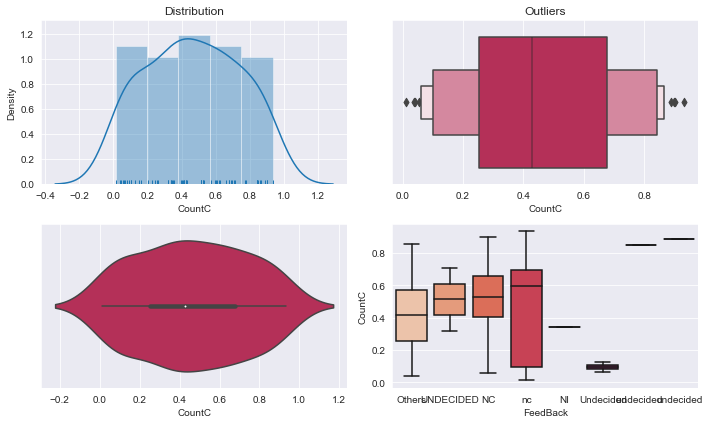

In [181]:
# Checking The distribution of CountC feature
fig,ax=plt.subplots(2,2,figsize=(10,6))

sns.distplot(dataset['CountC'],rug=True,ax=ax[0,0])
ax[0,0].set_title("Distribution")

sns.boxenplot(x=dataset['CountC'],data=dataset,palette='rocket_r',ax=ax[0,1])
ax[0,1].set_title("Outliers")

sns.violinplot(x=dataset['CountC'],alpha=.7,palette='rocket_r',data=dataset,ax=ax[1,0])
sns.boxplot(x=dataset['FeedBack'],y=dataset['CountC'],data=dataset,palette='rocket_r',ax=ax[1,1])

plt.tight_layout()
plt.show()

Variable Descriptions: We've got a sense of our variables, their class type, and the first few Observations of each.
    We Know we're working with 64 observation of 7 variables.Here's what we've got to deal with Attribute Information:
* ID – LeadID
* Type – Mode of Communication
* Date – Time of Communication
* CountA-C – Some arbitrary measurements for that Lead
* User – User who makes the communication
* FeedBack – Outcome of the communication (NC – No Contact, NI- Not Interested)


In [29]:
data=dataset.copy()

In the target variable (feedback) we have group the undecided , Undecided and UNDECIDED label
Bcoz the names are same.
* And group the NC and nc label too.
* There was others variable named as Others so I have assign the 'Other' columns as NI which means the not Interested.
* bcoz the question stated the feedback as the 2 labels called not interested(NI) and No contact NC.

In [31]:
data=data.replace(['Undecided ','undecided'],'UNDECIDED')

In [49]:
Value_counts=pd.DataFrame({'FeedBack':data['FeedBack'].value_counts()})
Value_counts

,FeedBack
NI,30
NC,28
Undecided,5
undecided,1


In [30]:
data=data.replace(['nc'],'NC')

In [30]:
data=data.replace(['undecided'],'UNDECIDED')

In [44]:
data=data.replace(['undecided'],'Undecided')


In [48]:
data=data.replace(['Others'],'NI')

In [50]:
data

,Id,Type,Date,CountA,CountB,CountC,FeedBack
0,10121,Email,2016-08-04 10:16:47,0.096352,0.769845,0.159108,NI
1,10122,Email,2016-08-04 10:18:28,0.586269,0.953805,0.351482,NI
2,10123,Email,2016-08-04 10:30:24,0.723392,0.761742,0.527675,NI
3,10124,Email,2016-08-04 10:41:56,0.516635,0.391858,0.425367,NI
4,10125,Email,2016-08-04 10:59:00,0.112042,0.651565,0.514086,NI
...,...,...,...,...,...,...,...
59,10215,Update,2016-08-04 17:44:26,0.450194,0.053212,0.103549,NI
60,10216,Email,2016-08-04 17:44:37,0.413114,0.600757,0.041972,NI
61,10217,Update,2016-08-04 18:07:52,0.595915,0.759617,0.771144,NC
62,10218,Email,2016-08-04 19:04:04,0.691952,0.189839,0.246419,NI


In [51]:
new_dataset=data.copy()

In [52]:
new_dataset

,Id,Type,Date,CountA,CountB,CountC,FeedBack
0,10121,Email,2016-08-04 10:16:47,0.096352,0.769845,0.159108,NI
1,10122,Email,2016-08-04 10:18:28,0.586269,0.953805,0.351482,NI
2,10123,Email,2016-08-04 10:30:24,0.723392,0.761742,0.527675,NI
3,10124,Email,2016-08-04 10:41:56,0.516635,0.391858,0.425367,NI
4,10125,Email,2016-08-04 10:59:00,0.112042,0.651565,0.514086,NI
...,...,...,...,...,...,...,...
59,10215,Update,2016-08-04 17:44:26,0.450194,0.053212,0.103549,NI
60,10216,Email,2016-08-04 17:44:37,0.413114,0.600757,0.041972,NI
61,10217,Update,2016-08-04 18:07:52,0.595915,0.759617,0.771144,NC
62,10218,Email,2016-08-04 19:04:04,0.691952,0.189839,0.246419,NI


In [158]:
new_dataset['FeedBack'].value_counts()

1    30
0    28
2     5
3     1
Name: FeedBack, dtype: int64

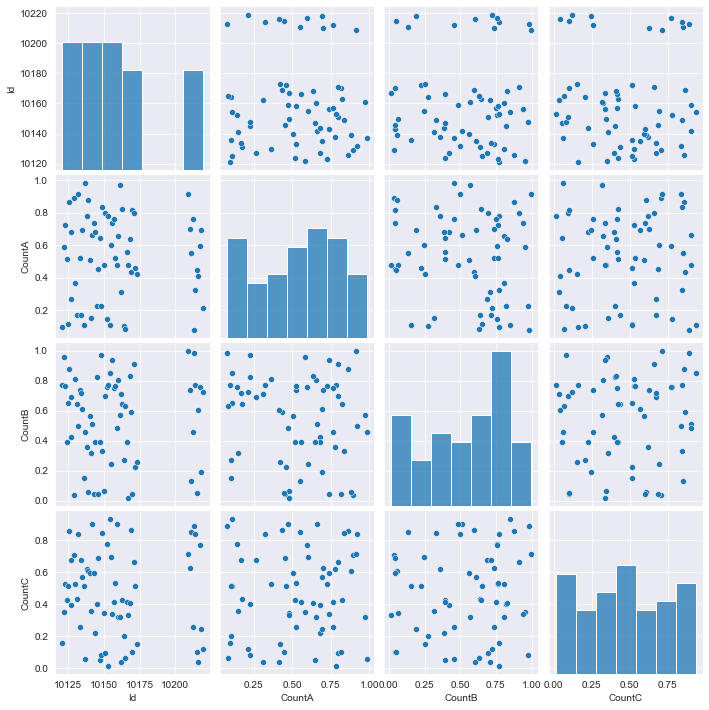

In [53]:
sns.set_style(style='darkgrid')
sns.pairplot(new_dataset)

Encoding the dataset for target variable called feedback 

In [54]:
from sklearn.preprocessing import LabelEncoder

In [56]:
labelencoder = LabelEncoder()
new_dataset.iloc[:, -1] = labelencoder.fit_transform(new_dataset.iloc[:,-1])

In [57]:
new_dataset

,Id,Type,Date,CountA,CountB,CountC,FeedBack
0,10121,Email,2016-08-04 10:16:47,0.096352,0.769845,0.159108,1
1,10122,Email,2016-08-04 10:18:28,0.586269,0.953805,0.351482,1
2,10123,Email,2016-08-04 10:30:24,0.723392,0.761742,0.527675,1
3,10124,Email,2016-08-04 10:41:56,0.516635,0.391858,0.425367,1
4,10125,Email,2016-08-04 10:59:00,0.112042,0.651565,0.514086,1
...,...,...,...,...,...,...,...
59,10215,Update,2016-08-04 17:44:26,0.450194,0.053212,0.103549,1
60,10216,Email,2016-08-04 17:44:37,0.413114,0.600757,0.041972,1
61,10217,Update,2016-08-04 18:07:52,0.595915,0.759617,0.771144,0
62,10218,Email,2016-08-04 19:04:04,0.691952,0.189839,0.246419,1


In [58]:
labelencoder = LabelEncoder()
new_dataset.iloc[:, 1] = labelencoder.fit_transform(new_dataset.iloc[:,1])

In [78]:
new_dataset

,Id,Type,CountA,CountB,CountC,FeedBack
0,10121,1,0.096352,0.769845,0.159108,1
1,10122,1,0.586269,0.953805,0.351482,1
2,10123,1,0.723392,0.761742,0.527675,1
3,10124,1,0.516635,0.391858,0.425367,1
4,10125,1,0.112042,0.651565,0.514086,1
...,...,...,...,...,...,...
59,10215,2,0.450194,0.053212,0.103549,1
60,10216,1,0.413114,0.600757,0.041972,1
61,10217,2,0.595915,0.759617,0.771144,0
62,10218,1,0.691952,0.189839,0.246419,1


In [77]:
new_dataset=new_dataset.drop(['Date'],axis=1)

Again drop the date and time columns same date in the whole rows which does not help in the predict the feedback

In [168]:
X=new_dataset.drop(labels='FeedBack',axis=1)
Y=new_dataset['FeedBack']

In [169]:
X

,Id,Type,CountA,CountB,CountC
0,10121,1,0.096352,0.769845,0.159108
1,10122,1,0.586269,0.953805,0.351482
2,10123,1,0.723392,0.761742,0.527675
3,10124,1,0.516635,0.391858,0.425367
4,10125,1,0.112042,0.651565,0.514086
...,...,...,...,...,...
59,10215,2,0.450194,0.053212,0.103549
60,10216,1,0.413114,0.600757,0.041972
61,10217,2,0.595915,0.759617,0.771144
62,10218,1,0.691952,0.189839,0.246419


In [81]:
Y

0     1
1     1
2     1
3     1
4     1
     ..
59    1
60    1
61    0
62    1
63    2
Name: FeedBack, Length: 64, dtype: int32

# Model Building

* spilting the dataset into x and y.the testsize is assign as the 30% 
* the dataset is give as classification datset so we are using the logistics regression and decision tree

In [82]:
X.shape,Y.shape

((64, 5), (64,))

In [109]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state = 12)

In [110]:
X_train.shape,y_train.shape

((44, 5), (44,))

In [111]:
X_test.shape,y_test.shape

((20, 5), (20,))

In [112]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [114]:
logistic_model.coef_

array([[-2.16848285e-04,  1.76358098e+00,  1.09215733e-01,
        -1.16625305e-01,  8.48219317e-02],
       [ 3.67842108e-04, -1.93840449e+00, -1.15426961e-01,
         9.53450976e-02, -1.59041723e-02],
       [-1.50993823e-04,  1.74823511e-01,  6.21122723e-03,
         2.12802071e-02, -6.89177594e-02]])

In [115]:
logistic_model.intercept_

array([ 0.00039157,  0.00055416, -0.00094574])

# TRAINING

In [116]:
y_pred_train = dt_model.predict(X_train)

In [117]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_train,y_pred_train))

1.0


In [118]:
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00         2

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [119]:
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Confusion Matrix:
 [[20  0  0]
 [ 0 22  0]
 [ 0  0  2]]


# TESTING

In [120]:
y_pred_test = logistic_model.predict(X_test)

In [121]:
accuracy_score(y_test,y_pred_test)

0.7

In [122]:
y_pred_test = dt_model.predict(X_test)

In [123]:
accuracy_score(y_test,y_pred_test)

0.7

In [124]:
confusion_matrix(y_test,y_pred_test)

array([[8, 0, 0, 0],
       [2, 6, 0, 0],
       [2, 1, 0, 0],
       [1, 0, 0, 0]], dtype=int64)

Accuracy
* For Train data the accuracy is 100%
* For Test data the accuracy is 70%

# Model Depolyment

In [102]:
from pickle import dump

In [103]:
dump(logistic_model,open('log_model.pkl','wb'))

In [104]:
from pickle import load

In [105]:
loaded_logistic_model = load(open('log_model.pkl','rb'))

In [106]:
y_prediction_validation = loaded_logistic_model.predict(X_test)

# Predicting the new dataset

In [131]:
new_data=pd.DataFrame({'Id':10223,'Type':1,'CountA':0.988,'CountB':0.7543,'CountC':0.5676},index=[1])

In [163]:
label1=dt_model.predict(new_data)

In [164]:
label1

array([1])

In [154]:
new_data2=pd.DataFrame({'Id':10234,'Type':2,'CountA':0.943,'CountB':0.7473,'CountC':0.5126},index=[1])

In [161]:
label2=logistic_model.predict(new_data2)

In [162]:
label2

array([0])